## The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, the task is to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

**Data Dictionary**
- PassengerId
- Survived: 0=No, 1=Yes
- Pclass (ticket class): 1=1st/upper, 2=2nd/middle, 3=3rd/lower
- Name
- Sex: male or female
- Age 
- Sibsp (# of siblings or spouses aboard)
- Parch (# of parents/children aboard)
- Ticket (#)
- Fare 
- Cabin (#)
- Embarked (port) - C=Cherbourg, Q=Queenstown, S=Southampton

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_df = pd.read_csv('gender_submission.csv')

In [3]:
train_df.shape

(891, 12)

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.shape

(418, 11)

In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Bivariate Analyses

The median **age** for both victims and survivors are at around 30 years old.

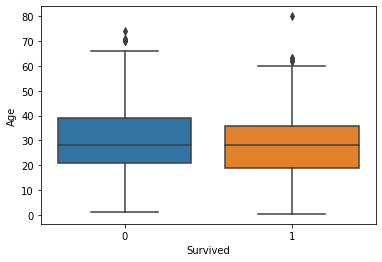

In [7]:
sns.boxplot(x=train_df['Survived'], y=train_df['Age'])

Most passengers have 1 or none **sibling or spouse** onboard except a few outliers.

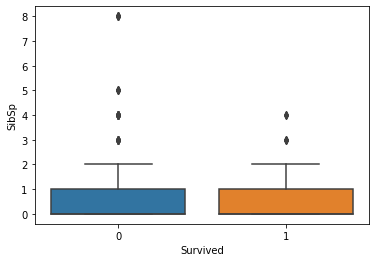

In [8]:
sns.boxplot(x=train_df['Survived'], y=train_df['SibSp'])

Most victims--except a few outliers--have no **parents or children** onboard while most survivors have 1 or none.

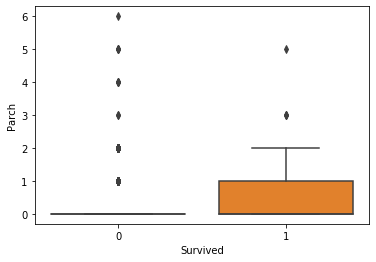

In [9]:
sns.boxplot(x=train_df['Survived'], y=train_df['Parch'])

The median **fare** for both victims and survivors is the same, i.e., below 100.

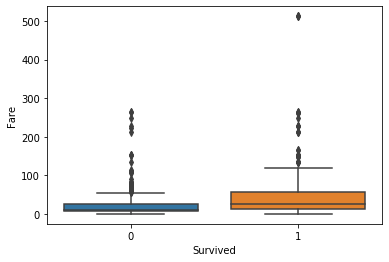

In [10]:
sns.boxplot(x=train_df['Survived'], y=train_df['Fare'])

First-class passengers have a survival rate of about 60%, in contrast to second-class passengers at about 45% and third-class passengers at 20%.

[Text(0, 0.5, 'Survival rate'), Text(0.5, 0, 'Class')]

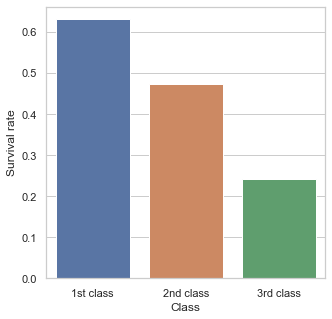

In [11]:
survived_1 = len(train_df.loc[(train_df['Pclass']==1) & (train_df['Survived']==1)])
survived_2 = len(train_df.loc[(train_df['Pclass']==2) & (train_df['Survived']==1)])
survived_3 = len(train_df.loc[(train_df['Pclass']==3) & (train_df['Survived']==1)])
                 
dead_1 = len(train_df.loc[(train_df['Pclass']==1) & (train_df['Survived']==0)])
dead_2 = len(train_df.loc[(train_df['Pclass']==2) & (train_df['Survived']==0)])
dead_3 = len(train_df.loc[(train_df['Pclass']==3) & (train_df['Survived']==0)])
             
sns.set(style='whitegrid')
x=['1st class', '2nd class', '3rd class']
y=[survived_1/(survived_1+dead_1), survived_2/(survived_2+dead_2), survived_3/(survived_3+dead_3)]
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=x,y=y)
ax.set(xlabel='Class', ylabel='Survival rate')

Survival rate is at about 50% higher for females than males.

[Text(0, 0.5, 'Survival rate'), Text(0.5, 0, 'Sex')]

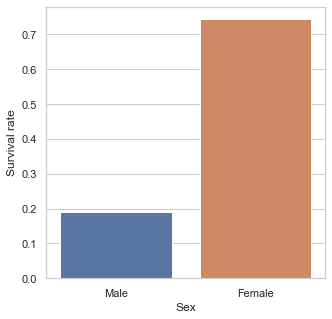

In [12]:
survived_m = len(train_df.loc[(train_df['Sex']=='male') & (train_df['Survived']==1)])
survived_f = len(train_df.loc[(train_df['Sex']=='female') & (train_df['Survived']==1)])
                 
dead_m = len(train_df.loc[(train_df['Sex']=='male') & (train_df['Survived']==0)])
dead_f = len(train_df.loc[(train_df['Sex']=='female') & (train_df['Survived']==0)])
             
sns.set(style='whitegrid')
x=['Male','Female']
y=[survived_m/(survived_m+dead_m), survived_f/(survived_f+dead_f)]
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=x,y=y)
ax.set(xlabel='Sex', ylabel='Survival rate')

## Preprocessing

### Missing values treatment

In [13]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Missing ages can be replaced for each pclass with the mean age for that class.

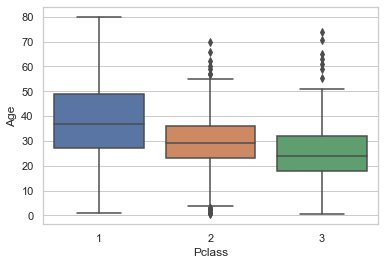

In [15]:
sns.boxplot(x=train_df['Pclass'], y=train_df['Age'])

In [16]:
#Dividing the df into classes
class_1 = train_df.loc[train_df['Pclass']==1]
class_2 = train_df.loc[train_df['Pclass']==2]
class_3 = train_df.loc[train_df['Pclass']==3]

#Then replacing missing values with the mean per class
class_1['Age'].fillna(class_1['Age'].mean(), inplace=True)
class_2['Age'].fillna(class_2['Age'].mean(), inplace=True)
class_3['Age'].fillna(class_3['Age'].mean(), inplace=True)

C:\Users\Rosiel Jazmine V\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [17]:
train_df = pd.concat([class_1, class_2, class_3])

#### Because 77% of the cabin numbers are missing, better to drop that column instead along with other columns that will not be used in modeling (Ticket, Embarked).

In [18]:
train_df.drop(columns=['Cabin','Ticket','Embarked'], inplace=True)

### Outliers treatment

Create only 2 groups for SibSp (Parch): those with **siblings or spouses (parents or children)** and those without.

In [19]:
with_sibsp = lambda x: 0 if x==0 else 1
train_df['with_sibsp'] = train_df.apply(lambda row: with_sibsp(row['SibSp']), axis=1)

with_parch = lambda x: 0 if x==0 else 1
train_df['with_parch'] = train_df.apply(lambda row: with_parch(row['Parch']), axis=1)

In [20]:
train_df.drop(columns=['SibSp','Parch'], inplace=True)

For continuous variables with outliers, namely, **Age and Fare**, create brackets: bottom 25%, middle 50%, top 25%.

In [21]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,Fare,with_sibsp,with_parch
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.292875,32.204208,0.317621,0.239057
std,257.353842,0.486592,0.836071,13.210527,49.693429,0.465813,0.426747
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,26.000000,14.454200,0.000000,0.000000
75%,668.500000,1.000000,3.000000,37.000000,31.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200,1.000000,1.000000


In [22]:
age_bracket = lambda x: 'young' if x <= 22 else 'middle-aged' if x <= 37 else 'old'
train_df['age_bracket'] = train_df.apply(lambda row: age_bracket(row['Age']), axis=1)

fare_bracket = lambda x: 'cheap' if x <= 8 else 'average' if x <= 31 else 'expensive'
train_df['fare_bracket'] = train_df.apply(lambda row: fare_bracket(row['Fare']), axis=1)

In [23]:
train_df.drop(columns=['Age','Fare'], inplace=True)

In [24]:
train_df['age_bracket'].value_counts()

middle-aged    442
young          231
old            218
Name: age_bracket, dtype: int64

In [25]:
train_df['fare_bracket'].value_counts()

average      428
cheap        241
expensive    222
Name: fare_bracket, dtype: int64

[Text(0, 0.5, 'Survival rate'), Text(0.5, 0, 'Age bracket')]

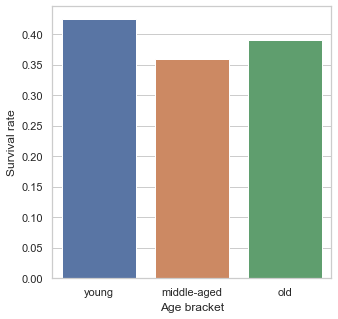

In [26]:
survived_young = len(train_df.loc[(train_df['age_bracket']=='young') & (train_df['Survived']==1)])
survived_middle = len(train_df.loc[(train_df['age_bracket']=='middle-aged') & (train_df['Survived']==1)])
survived_old = len(train_df.loc[(train_df['age_bracket']=='old') & (train_df['Survived']==1)])
                 
dead_young = len(train_df.loc[(train_df['age_bracket']=='young') & (train_df['Survived']==0)])
dead_middle = len(train_df.loc[(train_df['age_bracket']=='middle-aged') & (train_df['Survived']==0)])
dead_old = len(train_df.loc[(train_df['age_bracket']=='old') & (train_df['Survived']==0)])
             
sns.set(style='whitegrid')
x=['young','middle-aged','old']
y=[survived_young/(survived_young+dead_young), survived_middle/(survived_middle+dead_middle), survived_old/(survived_old+dead_old)]
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=x,y=y)
ax.set(xlabel='Age bracket', ylabel='Survival rate')

[Text(0, 0.5, 'Survival rate'), Text(0.5, 0, 'Fare bracket')]

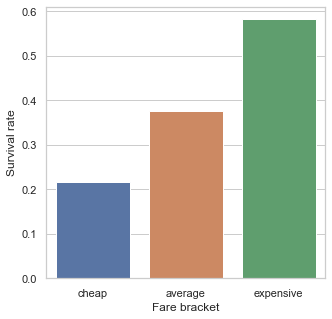

In [27]:
survived_cheap = len(train_df.loc[(train_df['fare_bracket']=='cheap') & (train_df['Survived']==1)])
survived_average = len(train_df.loc[(train_df['fare_bracket']=='average') & (train_df['Survived']==1)])
survived_expensive = len(train_df.loc[(train_df['fare_bracket']=='expensive') & (train_df['Survived']==1)])
                 
dead_cheap = len(train_df.loc[(train_df['fare_bracket']=='cheap') & (train_df['Survived']==0)])
dead_average = len(train_df.loc[(train_df['fare_bracket']=='average') & (train_df['Survived']==0)])
dead_expensive = len(train_df.loc[(train_df['fare_bracket']=='expensive') & (train_df['Survived']==0)])
             
sns.set(style='whitegrid')
x=['cheap','average','expensive']
y=[survived_cheap/(survived_cheap+dead_cheap), survived_average/(survived_average+dead_average), survived_expensive/(survived_expensive+dead_expensive)]
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=x,y=y)
ax.set(xlabel='Fare bracket', ylabel='Survival rate')

### Variable transformation

Encode **categorical variables (Sex, age_bracket, fare_bracket)** so that they can be used in modeling.

In [28]:
cat = ['Sex', 'age_bracket', 'fare_bracket']
train_df = pd.get_dummies(train_df, columns=cat)
train_df.head()

,PassengerId,Survived,Pclass,Name,with_sibsp,with_parch,Sex_female,Sex_male,age_bracket_middle-aged,age_bracket_old,age_bracket_young,fare_bracket_average,fare_bracket_cheap,fare_bracket_expensive
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1,0,0,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1,0,1,0,0,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,0,0,1,0,1,0,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",0,0,1,0,0,1,0,1,0,0
23,24,1,1,"Sloper, Mr. William Thompson",0,0,0,1,1,0,0,0,0,1


In [30]:
train_df.drop(columns=['Name'],inplace=True)

## Modeling

In [31]:
from sklearn import model_selection as ms, linear_model as lm, tree, ensemble

Set the inputs as X and the output (Survived) as y.

In [32]:
X = train_df.drop(['PassengerId','Survived'], axis=1)
y = train_df['Survived']

Use stratified k-fold validation since dataset is small.

In [33]:
ten_fold_cv = ms.StratifiedKFold(n_splits=10, shuffle=True)

### Logistic regression

In [34]:
logreg = lm.LogisticRegression(C=1e50, solver='liblinear')
logreg.fit(X,y)
aucs = ms.cross_val_score(logreg, X, y, scoring='roc_auc', cv=ten_fold_cv)
np.mean(aucs)

0.8373239538239539

### Decision trees classification

In [35]:
tree = tree.DecisionTreeClassifier()
tree.fit(X,y)
aucs = ms.cross_val_score(tree, X, y, scoring='roc_auc', cv=ten_fold_cv)
np.mean(aucs)

0.8420356506238859

### Random forest classification

In [36]:
for n_trees in [2,5,10,20,50,100]:
    aucs = ms.cross_val_score(ensemble.RandomForestClassifier(n_estimators=n_trees),X,y, scoring='roc_auc', cv=ten_fold_cv)
    print('{:>3} trees: mean AUC {: .2%}'.format(n_trees, np.mean(aucs)))

  2 trees: mean AUC  83.68%
  5 trees: mean AUC  84.26%
 10 trees: mean AUC  84.57%
 20 trees: mean AUC  84.59%
 50 trees: mean AUC  84.22%
100 trees: mean AUC  83.90%


Based on the mean AUCS scores, random forest classification performs best, so this model will be used for the test set.

## Evaluation

In [37]:
gender_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [38]:
rfc = ensemble.RandomForestClassifier(n_estimators=20)
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
X.columns

Index(['Pclass', 'with_sibsp', 'with_parch', 'Sex_female', 'Sex_male',
       'age_bracket_middle-aged', 'age_bracket_old', 'age_bracket_young',
       'fare_bracket_average', 'fare_bracket_cheap', 'fare_bracket_expensive'],
      dtype='object')

In [40]:
rfc.feature_importances_

array([0.20774257, 0.05857201, 0.07453554, 0.24009847, 0.23885913,
       0.02477524, 0.03108294, 0.03463075, 0.03053041, 0.02258753,
       0.03658541])

Based on the model, the most important features are sex and passenger class
- Sex_female: 24%
- Sex_male: 23.8%
- Pclass: 20.7%

In [42]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Repeating the same variable transformations to the test set

In [43]:
#Dividing the df into classes
class_1 = test_df.loc[test_df['Pclass']==1]
class_2 = test_df.loc[test_df['Pclass']==2]
class_3 = test_df.loc[test_df['Pclass']==3]

#Then replacing missing values with the mean per class
class_1['Age'].fillna(class_1['Age'].mean(), inplace=True)
class_2['Age'].fillna(class_2['Age'].mean(), inplace=True)
class_3['Age'].fillna(class_3['Age'].mean(), inplace=True)

#Combining the classes into one df 
test_df = pd.concat([class_1, class_2, class_3])
test_df.drop(columns=['Cabin','Ticket','Embarked'], inplace=True)

#Creating only 2 groups each for SibSp and Parch
test_df['with_sibsp'] = test_df.apply(lambda row: with_sibsp(row['SibSp']), axis=1)
test_df['with_parch'] = test_df.apply(lambda row: with_parch(row['Parch']), axis=1)
test_df.drop(columns=['SibSp','Parch'], inplace=True)

#Bracketing Age and Fare
test_df['age_bracket'] = test_df.apply(lambda row: age_bracket(row['Age']), axis=1)
test_df['fare_bracket'] = test_df.apply(lambda row: fare_bracket(row['Fare']), axis=1)
test_df.drop(columns=['Age','Fare'], inplace=True)

cat = ['Sex', 'age_bracket', 'fare_bracket']
test_df = pd.get_dummies(test_df, columns=cat)

test_df.drop(columns=['Name'],inplace=True)

C:\Users\Rosiel Jazmine V\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [44]:
test_df.columns

Index(['PassengerId', 'Pclass', 'with_sibsp', 'with_parch', 'Sex_female',
       'Sex_male', 'age_bracket_middle-aged', 'age_bracket_old',
       'age_bracket_young', 'fare_bracket_average', 'fare_bracket_cheap',
       'fare_bracket_expensive'],
      dtype='object')

In [45]:
test_df.head()

,PassengerId,Pclass,with_sibsp,with_parch,Sex_female,Sex_male,age_bracket_middle-aged,age_bracket_old,age_bracket_young,fare_bracket_average,fare_bracket_cheap,fare_bracket_expensive
11,903,1,0,0,0,1,0,1,0,1,0,0
12,904,1,1,0,1,0,1,0,0,0,0,1
14,906,1,1,0,1,0,0,1,0,0,0,1
20,912,1,1,0,0,1,0,1,0,0,0,1
22,914,1,0,0,1,0,0,1,0,0,0,1


In [46]:
test_df.shape

(418, 12)

In [47]:
test_df.sort_values(by='PassengerId', inplace=True)
test_df.head()

,PassengerId,Pclass,with_sibsp,with_parch,Sex_female,Sex_male,age_bracket_middle-aged,age_bracket_old,age_bracket_young,fare_bracket_average,fare_bracket_cheap,fare_bracket_expensive
0,892,3,0,0,0,1,1,0,0,0,1,0
1,893,3,1,0,1,0,0,1,0,0,1,0
2,894,2,0,0,0,1,0,1,0,1,0,0
3,895,3,0,0,0,1,1,0,0,1,0,0
4,896,3,1,1,1,0,0,0,1,1,0,0


In [48]:
X_test = test_df.drop(['PassengerId'], axis=1)
test_df['Survived'] = rfc.predict(X_test)

In [49]:
test_df.head()

,PassengerId,Pclass,with_sibsp,with_parch,Sex_female,Sex_male,age_bracket_middle-aged,age_bracket_old,age_bracket_young,fare_bracket_average,fare_bracket_cheap,fare_bracket_expensive,Survived
0,892,3,0,0,0,1,1,0,0,0,1,0,0
1,893,3,1,0,1,0,0,1,0,0,1,0,0
2,894,2,0,0,0,1,0,1,0,1,0,0,0
3,895,3,0,0,0,1,1,0,0,1,0,0,0
4,896,3,1,1,1,0,0,0,1,1,0,0,0


In [50]:
submission = test_df[['PassengerId','Survived']]

In [51]:
submission.to_csv('submission.csv', encoding='utf-8', index=False)

This submission yielded a score of 0.72248 on Kaggle, which is lower than my first submission (0.77033, ranked at 6788 out of 12907). In my first submission, I did not create 3 brackets each for age and fare, and I did not create 2 groups each for sibling/spouse and parent/children. I did not even encode the categorical variables or scale the continuous ones. I simply used the raw dataset. Moreover, back then, I only used logistic regression, in contrast to random forest classification which is more advanced.